In [3]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [4]:

# Function to plot spectrogram
def plot_spectrogram(audio_path):
    # Load audio
    y, sr = librosa.load(audio_path, sr=None)

    # Compute Short-Time Fourier Transform (STFT)
    D = np.abs(librosa.stft(y))

    # Convert to decibels
    D_db = librosa.amplitude_to_db(D, ref=np.max)

    # Plot spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()



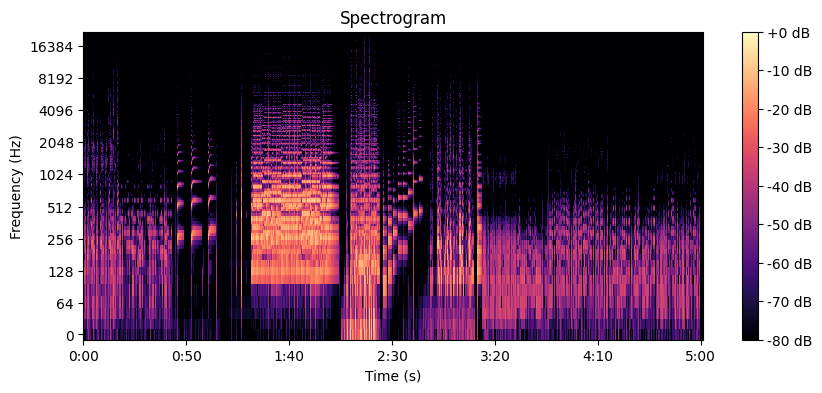

In [5]:
plot_spectrogram(r"Dataset\AD_DA_converter.wav")

In [ ]:
plot_spectrogram(r"Predicted\Orange_Rocker30_Head.wav")

In [1]:
models = [
    "Fender_Bassman50_Head",
    "Fender_deluxe_reverb",
    "Marshall_1959Plexi",
    "Marshall_JCM800",
    "Orange_Rocker30_Head"
]

Maximum amplitude index (predicted): 6026742
Extracting segment from sample 6026522 to 6026962


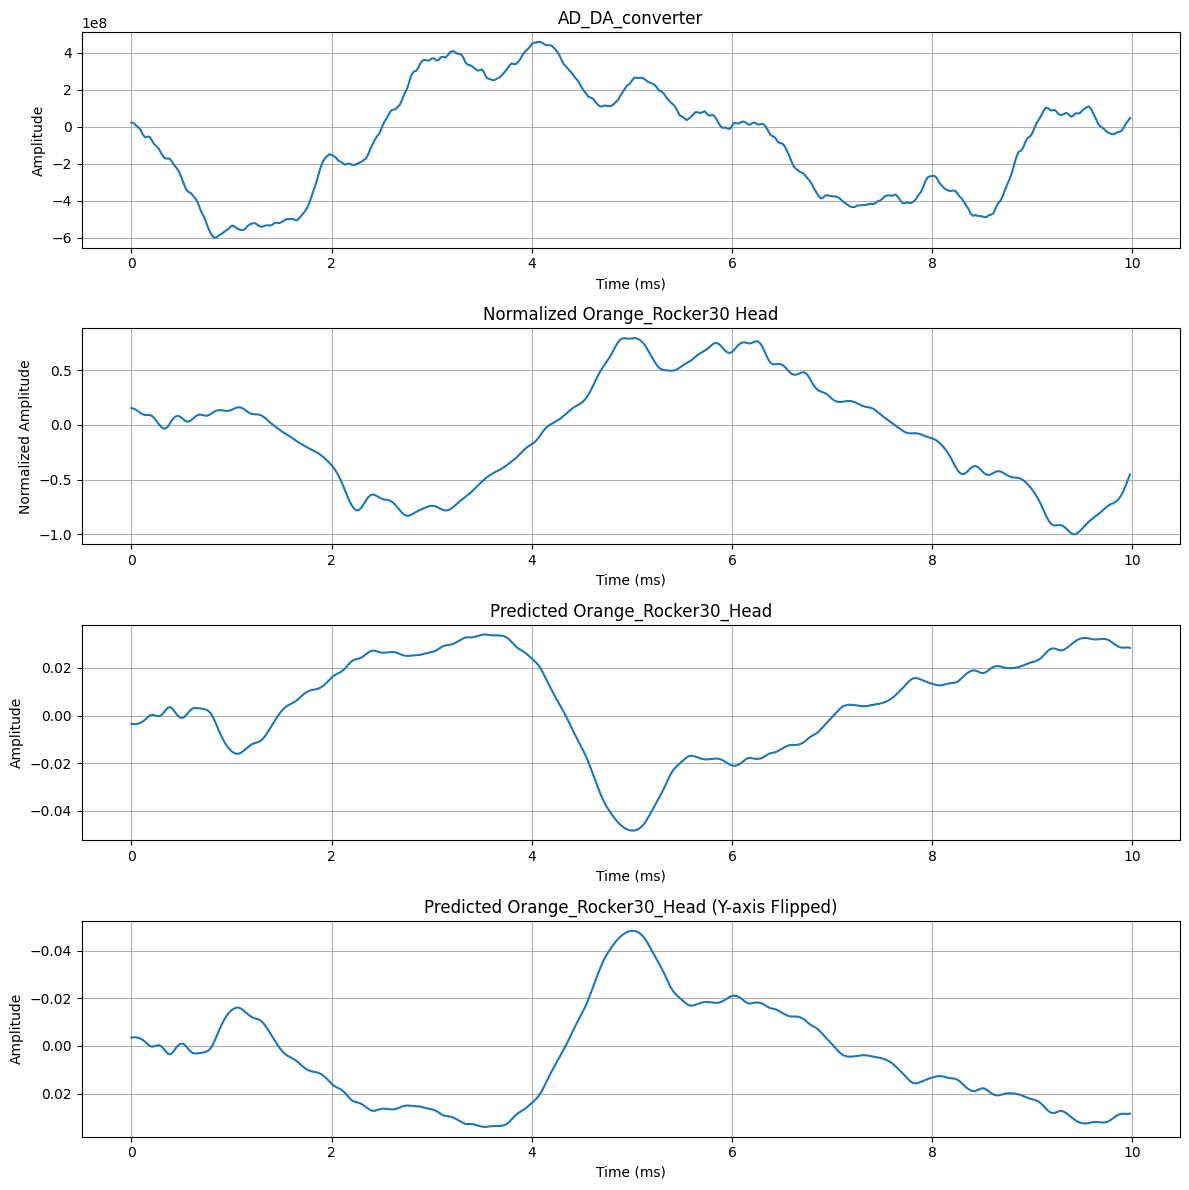

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def load_wav(file_path):
    """Load a wav file and return its sampling rate and mono data."""
    fs, data = wavfile.read(file_path)
    # If stereo, take the first channel.
    if data.ndim > 1:
        data = data[:, 0]
    return fs, data

# Define file paths (using raw strings)
file_ad_da = r"Dataset\AD_DA_converter.wav"
file_head  = r"Dataset\Orange_Rocker30_Head.wav"
file_pred  = r"Predicted\Orange_Rocker30_Head.wav"

# Load the files
fs_ad_da, data_ad_da = load_wav(file_ad_da)
fs_head, data_head   = load_wav(file_head)
fs_pred, data_pred   = load_wav(file_pred)

# Optional: Check if sampling rates match
if not (fs_ad_da == fs_head == fs_pred):
    print("Warning: Sampling rates differ among the files!")

# Use the predicted file's sampling rate for analysis.
fs = fs_pred

# Find the index of the maximum amplitude in the predicted signal.
max_index = np.argmax(np.abs(data_pred))
print("Maximum amplitude index (predicted):", max_index)

# Define a 10ms window (total samples) and compute half-window size.
window_samples = int(fs * 0.01)  # total number of samples in 10ms
half_window = window_samples // 2

# Ensure indices remain within the signal bounds.
start_index = max(0, max_index - half_window)
end_index   = min(len(data_pred), max_index + half_window)
print(f"Extracting segment from sample {start_index} to {end_index}")

# Extract segments from each file using the same indices.
seg_ad_da = data_ad_da[start_index:end_index]
seg_head  = data_head[start_index:end_index]
seg_pred  = data_pred[start_index:end_index]

# Normalize the second segment (Orange_Rocker30 Head)
if np.max(np.abs(seg_head)) != 0:
    seg_head_normalized = seg_head / np.max(np.abs(seg_head))
else:
    seg_head_normalized = seg_head

# Create a time axis in milliseconds for the extracted segment.
t = np.linspace(0, (end_index - start_index) / fs, end_index - start_index) * 1000

# Create subplots for each waveform plus one with flipped x-axis.
fig, axs = plt.subplots(4, 1, figsize=(12, 12))

# First subplot: AD_DA_converter
axs[0].plot(t, seg_ad_da)
axs[0].set_title("AD_DA_converter")
axs[0].set_xlabel("Time (ms)")
axs[0].set_ylabel("Amplitude")
axs[0].grid(True)

# Second subplot: Normalized Orange_Rocker30 Head
axs[1].plot(t, seg_head_normalized)
axs[1].set_title("Orange_Rocker30 Head")
axs[1].set_xlabel("Time (ms)")
axs[1].set_ylabel("Normalized Amplitude")
axs[1].grid(True)

# Third subplot: Predicted Orange_Rocker30_Head
axs[2].plot(t, seg_pred)
axs[2].set_title("Predicted Orange_Rocker30_Head")
axs[2].set_xlabel("Time (ms)")
axs[2].set_ylabel("Amplitude")
axs[2].grid(True)

# Fourth subplot: Predicted with flipped x-axis.
axs[3].plot(t, seg_pred)
axs[3].set_title("Predicted Orange_Rocker30_Head (Y-axis Flipped)")
axs[3].set_xlabel("Time (ms)")
axs[3].set_ylabel("Amplitude")
axs[3].grid(True)
# Invert the x-axis so time goes from high to low.
axs[3].invert_yaxis()

plt.tight_layout()
plt.show()


Maximum amplitude index (predicted): 6026742
Extracting segment from sample 6026522 to 6026962


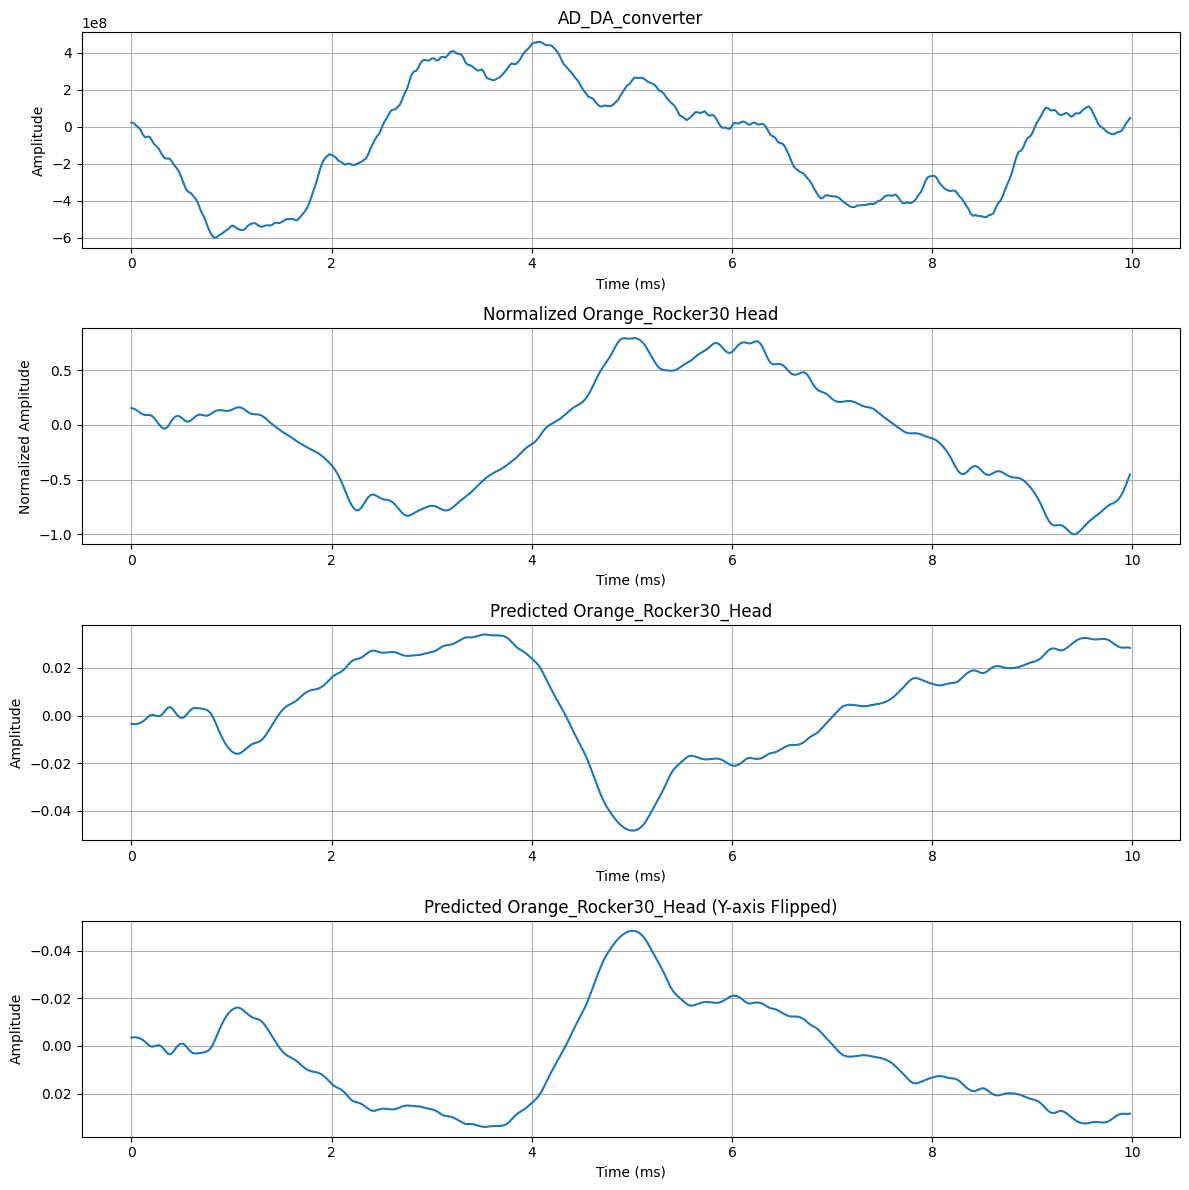

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def load_wav(file_path):
    """Load a wav file and return its sampling rate and mono data."""
    fs, data = wavfile.read(file_path)
    # If stereo, take the first channel.
    if data.ndim > 1:
        data = data[:, 0]
    return fs, data

# Define file paths (using raw strings)
file_ad_da = r"Dataset\AD_DA_converter.wav"
file_head  = r"Dataset\Orange_Rocker30_Head.wav"
file_pred  = r"Predicted\Orange_Rocker30_Head.wav"

# Load the files
fs_ad_da, data_ad_da = load_wav(file_ad_da)
fs_head, data_head   = load_wav(file_head)
fs_pred, data_pred   = load_wav(file_pred)

# Optional: Check if sampling rates match
if not (fs_ad_da == fs_head == fs_pred):
    print("Warning: Sampling rates differ among the files!")

# Use the predicted file's sampling rate for analysis.
fs = fs_pred

# Find the index of the maximum amplitude in the predicted signal.
max_index = np.argmax(np.abs(data_pred))
print("Maximum amplitude index (predicted):", max_index)

# Define a 10ms window (total samples) and compute half-window size.
window_samples = int(fs * 0.01)  # total number of samples in 10ms
half_window = window_samples // 2

# Ensure indices remain within the signal bounds.
start_index = max(0, max_index - half_window)
end_index   = min(len(data_pred), max_index + half_window)
print(f"Extracting segment from sample {start_index} to {end_index}")

# Extract segments from each file using the same indices.
seg_ad_da = data_ad_da[start_index:end_index]
seg_head  = data_head[start_index:end_index]
seg_pred  = data_pred[start_index:end_index]

# Normalize the second segment (Orange_Rocker30 Head)
if np.max(np.abs(seg_head)) != 0:
    seg_head_normalized = seg_head / np.max(np.abs(seg_head))
else:
    seg_head_normalized = seg_head

# Create a time axis in milliseconds for the extracted segment.
t = np.linspace(0, (end_index - start_index) / fs, end_index - start_index) * 1000

# Create subplots for each waveform plus one with flipped x-axis.
fig, axs = plt.subplots(4, 1, figsize=(12, 12))

# First subplot: AD_DA_converter
axs[0].plot(t, seg_ad_da)
axs[0].set_title("AD_DA_converter")
axs[0].set_xlabel("Time (ms)")
axs[0].set_ylabel("Amplitude")
axs[0].grid(True)

# Second subplot: Normalized Orange_Rocker30 Head
axs[1].plot(t, seg_head_normalized)
axs[1].set_title("Normalized Orange_Rocker30 Head")
axs[1].set_xlabel("Time (ms)")
axs[1].set_ylabel("Normalized Amplitude")
axs[1].grid(True)

# Third subplot: Predicted Orange_Rocker30_Head
axs[2].plot(t, seg_pred)
axs[2].set_title("Predicted Orange_Rocker30_Head")
axs[2].set_xlabel("Time (ms)")
axs[2].set_ylabel("Amplitude")
axs[2].grid(True)

# Fourth subplot: Predicted with flipped x-axis.
axs[3].plot(t, seg_pred)
axs[3].set_title("Predicted Orange_Rocker30_Head (Y-axis Flipped)")
axs[3].set_xlabel("Time (ms)")
axs[3].set_ylabel("Amplitude")
axs[3].grid(True)
# Invert the x-axis so time goes from high to low.
axs[3].invert_yaxis()

plt.tight_layout()
plt.show()


In [6]:
def pre_emphasis_filter(x, coeff=0.95):
    """
    Applies a simple pre-emphasis filter to x
    """
    return np.concatenate([x, x - coeff * x])


def error_to_signal(y, y_pred, use_filter=1):
    """
    Error to signal ratio with optional pre-emphasis filter.
    Both y and y_pred are truncated to the shorter length.
    """
    # Truncate to the shorter length to avoid mismatched shapes
    min_len = min(len(y), len(y_pred))
    y = y[:min_len]
    y_pred = y_pred[:min_len]

    if use_filter == 1:
        y = pre_emphasis_filter(y)
        y_pred = pre_emphasis_filter(y_pred)

        # After pre-emphasis, y and y_pred are still guaranteed same length
        # (we used the same operation on both)
        # But if you'd like to be extra safe:
        # y, y_pred = y[:len(y_pred)], y_pred[:len(y)]

    return np.sum((y - y_pred) ** 2) / (np.sum(y**2) + 1e-10)

In [10]:
print(error_to_signal(seg_head_normalized, seg_pred_normalized*-1))
print(error_to_signal(seg_head_normalized, seg_pred_normalized))


0.15154518982207024
3.4116194504821453


Maximum amplitude index (predicted): 5267497
Extracting segment from sample 5267277 to 5267717


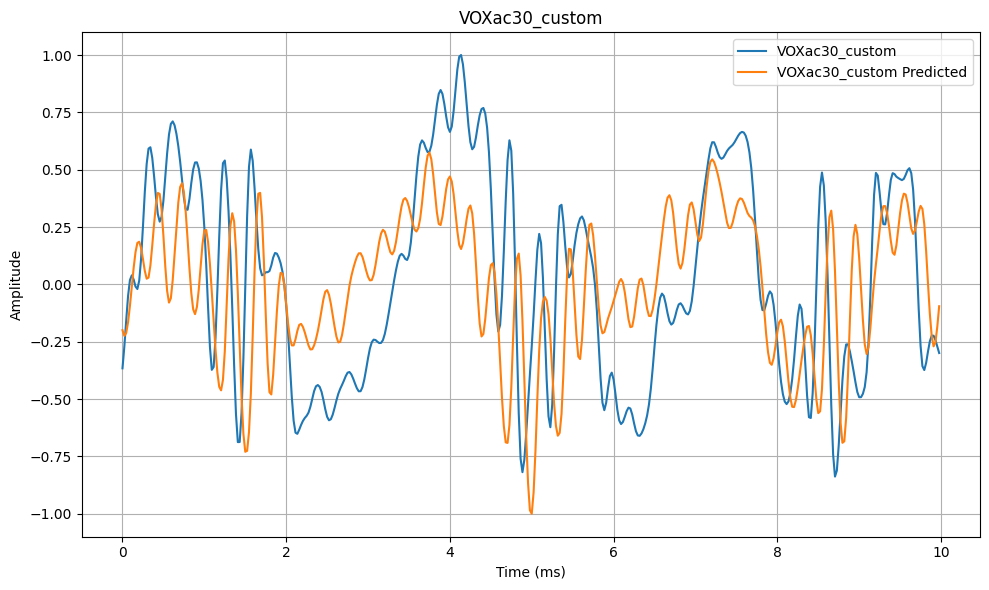

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def load_wav(file_path):
    """Load a wav file and return its sampling rate and mono data."""
    fs, data = wavfile.read(file_path)
    # If stereo, take the first channel.
    if data.ndim > 1:
        data = data[:, 0]
    return fs, data

# Define file paths (using raw strings)
head_name = "VOXac30_custom"
file_head  = f"Dataset\{head_name}.wav"
file_pred  = f"Predicted\{head_name}.wav"

# Load the files

fs_head, data_head   = load_wav(file_head)
fs_pred, data_pred   = load_wav(file_pred)

# Optional: Check if sampling rates match
if not (fs_ad_da == fs_head == fs_pred):
    print("Warning: Sampling rates differ among the files!")

# Use the predicted file's sampling rate for analysis.
fs = fs_pred

# Find the index of the maximum amplitude in the predicted signal.
max_index = np.argmax(np.abs(data_pred))
print("Maximum amplitude index (predicted):", max_index)

# Define a 10ms window (total samples) and compute half-window size.
window_samples = int(fs * 0.01)  # total number of samples in 10ms
half_window = window_samples // 2

# Ensure indices remain within the signal bounds.
start_index = max(0, max_index - half_window)
end_index   = min(len(data_pred), max_index + half_window)
print(f"Extracting segment from sample {start_index} to {end_index}")

# Extract segments from each file using the same indices.
seg_ad_da = data_ad_da[start_index:end_index]
seg_head  = data_head[start_index:end_index]
seg_pred  = data_pred[start_index:end_index]

# Normalize the second segment (Orange_Rocker30 Head)
if np.max(np.abs(seg_head)) != 0:
    seg_head_normalized = seg_head / np.max(np.abs(seg_head))
else:
    seg_head_normalized = seg_head

if np.max(np.abs(seg_head)) != 0:
    seg_pred_normalized = seg_pred / np.max(np.abs(seg_pred))
else:
    seg_pred_normalized = seg_pred

# Create a time axis in milliseconds for the extracted segment.
t = np.linspace(0, (end_index - start_index) / fs, end_index - start_index) * 1000

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, seg_head_normalized, label=f"{head_name}")
plt.plot(t, -seg_pred_normalized, label=f"{head_name} Predicted")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.title(f"{head_name}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
